In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading the Image

In [58]:
img = cv2.imread('../ruler_img.tiff',0)

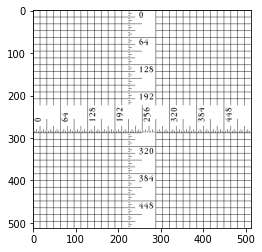

In [59]:
plt.imsave('ruler.png', img, cmap='gray')
plt.imshow(img, cmap='gray');

### Custom class for Median Filter

In [60]:
class MedianFilter(object):
    ''' Class for Median Filter '''
    
    def __init__(self, n) -> None:
        ''' Initialize the size of Median filter as nxn '''
        self.n = n
    
    def filter(self, image:np.ndarray) -> np.ndarray:
        ''' Smooth the Image using Median Filter. Uses a Window of size nxn. '''
        smooth_img = image.copy()
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                row_start, row_end = max(0, i - (self.n//2)), i + self.n//2 + 1
                col_start, col_end = max(0, j - (self.n//2)), j + self.n//2 + 1

                smooth_img[i,j] = np.median(image[row_start:row_end, col_start:col_end])
                # smooth_img[i,j,0] = np.median(image[row_start:row_end, col_start:col_end, 0])
                # smooth_img[i,j,1] = np.median(image[row_start:row_end, col_start:col_end, 1])
                # smooth_img[i,j,2] = np.median(image[row_start:row_end, col_start:col_end, 2])
        
        return smooth_img

### Implementing a 3x3 Median Filter

In [61]:
filter_3 = MedianFilter(3)
smooth_3 = filter_3.filter(img)

plt.imsave('smooth_ruler_median_filter_3x3.png', smooth_3, cmap='gray')

### Implementing a 5x5 Mean Filter

In [62]:
filter_5 = MedianFilter(5)
smooth_5 = filter_5.filter(img)

plt.imsave('smooth_ruler_median_filter_5x5.png', smooth_5, cmap='gray')

### Implementation using Inbuilt functions

#### 3x3 Inbuilt Median Filter

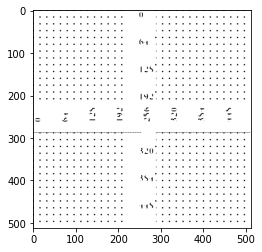

In [63]:
smooth_3_cv = cv2.medianBlur(src=img, ksize=3) 
plt.imshow(smooth_3_cv, cmap='gray');
plt.imsave('smooth_ruler_median_filter_3x3_cv2.png', smooth_3_cv, cmap='gray')

#### 5x5 Inbuilt Median Filter

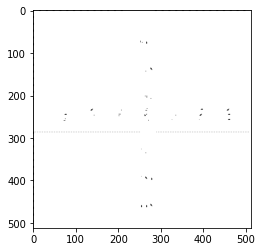

In [64]:
smooth_5_cv = cv2.medianBlur(src=img, ksize=5) 
plt.imshow(smooth_5_cv, cmap='gray');
plt.imsave('smooth_ruler_median_filter_5x5_cv2.png', smooth_5_cv, cmap='gray')